# ANLY 561 HW

Name:Yuqi Wang   
NetID:yw545

## Problem 1

In [14]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer() # Loads the Wisconsin Breast Cancer dataset (569 examples in 30 dimensions)

# Parameters for the data
dim_data = 30
num_labels = 2
num_examples = 569

# Parameters for training
num_train = 400

X = data['data'] # Data in rows
targets = data.target # 0-1 labels
labels = np.zeros((num_examples, num_labels))
for i in range(num_examples):
    labels[i,targets[i]]=1 # Conversion to one-hot representations


# Backtracking parameters
alpha = 0.1
beta = 0.5

# Let's use TensorFlow to train logisitic regression 

x = tf.placeholder(tf.float32, shape=[None, dim_data])
y_ = tf.placeholder(tf.float32, shape=[None, num_labels])

########################
b = tf.Variable(tf.zeros(num_labels))
w = tf.Variable(tf.zeros([dim_data, num_labels]))

b_bt = tf.Variable(tf.zeros(num_labels))
w_bt = tf.Variable(tf.zeros([dim_data, num_labels]))
########################

y_prime = tf.matmul(x, w) + b
y_prime_bt = tf.matmul(x, w_bt) + b_bt 

y = tf.nn.softmax(y_prime)
#y_bt = tf.nn.softmax(y_prime_bt)

f = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_prime))
f_bt = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_prime_bt))

################
# Start

sess = tf.Session()
sess.run(tf.global_variables_initializer())

correct_prediction = tf.equal(tf.argmax(y , 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

train_accuracy = sess.run(accuracy, feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
train_cross_entropy = sess.run(f, feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
print("Initial training accuracy %g, cross entropy %g" % (train_accuracy, train_cross_entropy))


for i in range(200):

    f0 = sess.run(f,feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
    f0= float(f0)
    
    dbf = sess.run(tf.gradients(f,b), feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})[0]
    dbf = np.array(dbf)
    dwf = sess.run(tf.gradients(f,w), feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})[0]
    dwf = np.array(dwf)
    
    delta = -(np.sum(dbf*dbf)+np.sum(dwf*dwf))*alpha
    #print(delta)
    t = 1
    ##################################
    sess.run(tf.assign(w_bt, sess.run(w) - t*dwf))
    sess.run(tf.assign(b_bt, sess.run(b) - t*dbf))

    fval = sess.run(f_bt, feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
    fval = float(fval)
    
    #print(f_orig + delta*t)

    while (not np.isfinite(fval)) or f0 + delta*t < fval:
    #for j in range (2):
        t = beta * t
        sess.run(tf.assign(w_bt, sess.run(w) - t*dwf))
        sess.run(tf.assign(b_bt, sess.run(b) - t*dbf))

        fval = sess.run(f_bt, feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
        fval = float(fval)

    sess.run(tf.assign(w, w_bt))
    sess.run(tf.assign(b, b_bt))

    train_accuracy = sess.run(accuracy, feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
    train_cross_entropy = sess.run(f, feed_dict={x: X[:num_train, :], y_: labels[:num_train, :]})
    
    print("i=%g, accuracy=%g, cross entropy=%g" % (i, train_accuracy, train_cross_entropy))

logistic_bt_accuracy = sess.run(accuracy, feed_dict={x: X[num_train:, :], y_: labels[num_train:, :]})
print("Final accuracy: %g" % logistic_bt_accuracy)
   
sess.close()


Initial training accuracy 0.4325, cross entropy 0.693147
i=0, accuracy=0.4325, cross entropy=0.668975
i=1, accuracy=0.4325, cross entropy=0.657811
i=2, accuracy=0.4325, cross entropy=0.655563
i=3, accuracy=0.4325, cross entropy=0.650564
i=4, accuracy=0.4325, cross entropy=0.64719
i=5, accuracy=0.4325, cross entropy=0.64578
i=6, accuracy=0.4325, cross entropy=0.640541
i=7, accuracy=0.4325, cross entropy=0.638319
i=8, accuracy=0.4325, cross entropy=0.634278
i=9, accuracy=0.4325, cross entropy=0.631467
i=10, accuracy=0.4325, cross entropy=0.6284
i=11, accuracy=0.49, cross entropy=0.625912
i=12, accuracy=0.4325, cross entropy=0.6201
i=13, accuracy=0.465, cross entropy=0.618234
i=14, accuracy=0.4325, cross entropy=0.614554
i=15, accuracy=0.4575, cross entropy=0.611923
i=16, accuracy=0.4325, cross entropy=0.610526
i=17, accuracy=0.455, cross entropy=0.606422
i=18, accuracy=0.4325, cross entropy=0.603528
i=19, accuracy=0.495, cross entropy=0.598911
i=20, accuracy=0.4375, cross entropy=0.59630

i=179, accuracy=0.905, cross entropy=0.373405
i=180, accuracy=0.9125, cross entropy=0.372884
i=181, accuracy=0.905, cross entropy=0.372407
i=182, accuracy=0.91, cross entropy=0.371379
i=183, accuracy=0.905, cross entropy=0.371061
i=184, accuracy=0.9125, cross entropy=0.37036
i=185, accuracy=0.905, cross entropy=0.369896
i=186, accuracy=0.9125, cross entropy=0.369384
i=187, accuracy=0.905, cross entropy=0.368884
i=188, accuracy=0.91, cross entropy=0.367923
i=189, accuracy=0.905, cross entropy=0.367567
i=190, accuracy=0.9125, cross entropy=0.366947
i=191, accuracy=0.905, cross entropy=0.366461
i=192, accuracy=0.905, cross entropy=0.36622
i=193, accuracy=0.9075, cross entropy=0.365462
i=194, accuracy=0.91, cross entropy=0.365013
i=195, accuracy=0.9075, cross entropy=0.364535
i=196, accuracy=0.905, cross entropy=0.36389
i=197, accuracy=0.9075, cross entropy=0.363118
i=198, accuracy=0.91, cross entropy=0.362678
i=199, accuracy=0.905, cross entropy=0.362497
Final accuracy: 0.905325


After about $50$ steps, the accuracy will be around $0.9$ and $0.91$.

## Problem 2

### Part (a)  

We have  
$$
\mathcal{A}=\left(\left(\begin{pmatrix}
a_{1,1,1,1} & a_{1,1,1,2}\\
a_{1,1,2,1} & a_{1,1,2,2}
\end{pmatrix}, \begin{pmatrix}
a_{1,2,1,1} & a_{1,2,1,2}\\
a_{1,2,2,1} & a_{1,2,2,2}
\end{pmatrix}\right),\left(\begin{pmatrix}
a_{2,1,1,1} & a_{2,1,1,2}\\
a_{2,1,2,1} & a_{2,1,2,2}
\end{pmatrix}, \begin{pmatrix}
a_{2,2,1,1} & a_{2,2,1,2}\\
a_{2,2,2,1} & a_{2,2,2,2}
\end{pmatrix}\right),\left(\begin{pmatrix}
a_{3,1,1,1} & a_{3,1,1,2}\\
a_{3,1,2,1} & a_{3,1,2,2}
\end{pmatrix}, \begin{pmatrix}
a_{3,2,1,1} & a_{3,2,1,2}\\
a_{3,2,2,1} & a_{3,2,2,2}
\end{pmatrix}\right)\right)=\left(\left(\begin{pmatrix}
1 & -1\\
-2 & 1
\end{pmatrix}, \begin{pmatrix}
1 & 1\\
-2 & 2
\end{pmatrix}\right),\left(\begin{pmatrix}
2 & -1\\
-1 & 1
\end{pmatrix}, \begin{pmatrix}
2 & 1\\
1 & 2
\end{pmatrix}\right),\left(\begin{pmatrix}
1 & -2\\
-2 & 1
\end{pmatrix}, \begin{pmatrix}
1 & 1\\
-1 & 1
\end{pmatrix}\right)\right)
$$  
and  
$$
\mathcal{B}=\begin{pmatrix}
b_{1,1} & b_{1,2}\\
b_{2,1} & b_{2,2}
\end{pmatrix}=\begin{pmatrix}
1 & -1\\
-2 & 2
\end{pmatrix}
$$  
Since $\mathcal{A}$ has the shape of 3 by 2 by 2 by 2 and $\mathcal{B}$ has the shape of 2 by 2, $\mathcal{F}$ (the contraction of $\mathcal{A}$ and $\mathcal{B}$ along $i={2,3}$ and $j={1,2}$) must have the shape of 3 by 2.Therefore, the order of $\mathcal{F}$ is 2.  
**Order: 2  
Shape: 3 by 2**

### Part (b)

$$
\mathcal{F}_{1,1}=a_{1,1,1,1}b_{1,1} + a_{1,1,2,1}b_{1,2} + a_{1,2,1,1}b_{2,1}+a_{1,2,2,1}b_{2,2}=(1)(1)+(-2)(-1)+(1)(-2)+(-2)(2)=1+2-2-4=-3
$$  
$$
\mathcal{F}_{1,2}=a_{1,1,1,2}b_{1,1} + a_{1,1,2,2}b_{1,2} + a_{1,2,1,2}b_{2,1}+a_{1,2,2,2}b_{2,2}=(-1)(1)+(1)(-1)+(1)(-2)+(2)(2)=-1-1-2+4=0
$$  
$$
\mathcal{F}_{2,1}=a_{2,1,1,1}b_{1,1} + a_{2,1,2,1}b_{1,2} + a_{2,2,1,1}b_{2,1}+a_{2,2,2,1}b_{2,2}=(2)(1)+(-1)(-1)+(2)(-2)+(1)(2)=2+1-4+2=1
$$  
$$
\mathcal{F}_{2,2}=a_{2,1,1,2}b_{1,1} + a_{2,1,2,2}b_{1,2} + a_{2,2,1,2}b_{2,1}+a_{2,2,2,2}b_{2,2}=(-1)(1)+(1)(-1)+(1)(-2)+(2)(2)=-1-1-2+4=0
$$  
$$
\mathcal{F}_{3,1}=a_{3,1,1,1}b_{1,1} + a_{3,1,2,1}b_{1,2} + a_{3,2,1,1}b_{2,1}+a_{3,2,2,1}b_{2,2}=(1)(1)+(-2)(-1)+(1)(-2)+(-1)(2)=1+2-2-2=-1
$$  
$$
\mathcal{F}_{3,2}=a_{3,1,1,2}b_{1,1} + a_{3,1,2,2}b_{1,2} + a_{3,2,1,2}b_{2,1}+a_{3,2,2,2}b_{2,2}=(-2)(1)+(1)(-1)+(1)(-2)+(1)(2)=-2-1-2+2=-3
$$  
Thus,  
$$
\mathcal{F}=\begin{pmatrix}
-3 & 0\\
1 & 0\\
-1 & -3
\end{pmatrix}
$$

In [2]:
import tensorflow as tf

A = tf.Variable([[[[1, -1], [-2, 1]],[[1, 1], [-2, 2]]],[[[2, -1], [-1, 1]],[[2, 1], [1, 2]]],[[[1, -2], [-2, 1]],[[1, 1], [-1, 1]]]], name='A') 
B = tf.Variable([[1, -1], [-2, 2]], name='B') # This is a 2 by 2 by 2 tensor
f = tf.tensordot(A, B, [[1,2], [0,1]]) # Contraction along two indices

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result = f.eval()

print('Result should be a 3 by 2 matrix:')
print(result)

Result should be a 3 by 2 matrix:
[[-3  0]
 [ 1  0]
 [-1 -3]]


We can see that two results are the same!

## Problem 3

### Part (a)

Our group have found 4 datasets. In this homework, I will only use one raw dataset called 'train.csv'.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

myDF = pd.read_csv('C:/Users/45336/Desktop/2017 Fall/Anlytics 561 Optimization/Project/train.csv')
print(myDF[:5],'\n')
print(myDF.describe())

         date  store_nbr  item_nbr  units
0  2012-01-01          1         1      0
1  2012-01-01          1         2      0
2  2012-01-01          1         3      0
3  2012-01-01          1         4      0
4  2012-01-01          1         5      0 

          store_nbr      item_nbr         units
count  4.617600e+06  4.617600e+06  4.617600e+06
mean   2.309108e+01  5.600000e+01  9.868756e-01
std    1.295281e+01  3.204164e+01  9.875798e+00
min    1.000000e+00  1.000000e+00  0.000000e+00
25%    1.200000e+01  2.800000e+01  0.000000e+00
50%    2.300000e+01  5.600000e+01  0.000000e+00
75%    3.400000e+01  8.400000e+01  0.000000e+00
max    4.500000e+01  1.110000e+02  5.568000e+03


We have $4.6176 \times 10^6$ records (data points) in this dataset, and $4$ fields for each record.  
In this dataset, there is $1$ column indicating date, which is 'date'. And column 'units' will change with 'date'.

### Part (b)

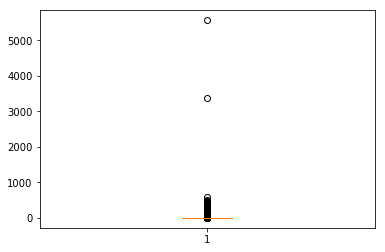

In [7]:
plt.boxplot(myDF['units'])
plt.show()

Most of data in the column 'units' are between $0$ and $1000$.

### Part (c)

In [8]:
# There are too many zero units. 
# So in the future analysis, we'd better eliminate all rows with 0 units.
myDF_without_zero_unit = myDF[myDF['units']!=0]
myDF_without_zero_unit = myDF_without_zero_unit.reset_index(drop = True)
print(myDF_without_zero_unit[:10])

         date  store_nbr  item_nbr  units
0  2012-01-01          1         9     29
1  2012-01-01          1        28      2
2  2012-01-01          1        51      1
3  2012-01-01          2         5    191
4  2012-01-01          2        44    215
5  2012-01-01          3         5    214
6  2012-01-01          3        45    112
7  2012-01-01          4         9     61
8  2012-01-01          4        27     21
9  2012-01-01          5        16     24


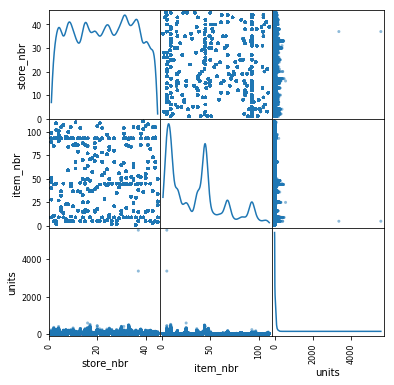

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(myDF_without_zero_unit, figsize=(6, 6), alpha=0.5, diagonal='kde')
plt.show()

**********************************